<a href="https://colab.research.google.com/github/IagoMagalhaes23/API-Rest-Flask/blob/main/ProjetoSquad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de classificação de pacientes saúdaveis ou com Covid-19

##Instalação de bibliotecas

##Importação das bibliotecas

In [ ]:
import os
import glob
import zipfile
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from google.colab import drive

##Carregando arquivos do Google Drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###Lendo arquivos

In [ ]:
endereco = '/content/gdrive/MyDrive/Squad 3 - Instituto Atlântico/imagens-covid19.zip' #endereço no drive do Iago
#enderco = '' #Adicione o endereço do seu drive

zip_object = zipfile.ZipFile(file=endereco, mode='r')
zip_object.extractall('./')
zip_object.close

train = 'train/'
test = 'test/'

In [ ]:
def readDir(diretorio):
    """
        Função para listagem de imagens
        :param diretorio: enedereço do diretório
    """
    listaimgs = os.listdir(diretorio)
    return listaimgs

In [ ]:
def readImage(local, listaimgs):
    """
        Função para leitura de imagens
        :param local: pasta das imagens
        :param listaimgs: nomes das imagens
    """
    imagens = []
    for i in listaimgs:
        imagens.append(cv.imread(local+i))
    
    return imagens

##Funções básicas

In [ ]:
def mostrar_imagemRGB(imagem):
  imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
  plt.imshow(imagem_rgb)

In [ ]:
def mostrar_imagemGRAY(imagem):
  imagem_gray = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)
  plt.imshow(imagem_gray)

In [ ]:
def mostrar_imagem(imagem):
  plt.imshow(imagem)

##Aplicando Pré-processamentos

In [ ]:
imagens = readDir(train)
img = readImage(train, imagens)

###Pipeline 1

In [ ]:
def pipeline1(imagem):
    """
        Função para realizar a pipeline 1
        :param imagem: imagem de entrada
        Descrição:
            - Converte a imagem para tons de cinza
            - Redimensiona a imagem para 196 por 196
            - Recorta a imagem, objetivando remover o diafragma
            - Aplica o filtro de mediana
            - Aplica uma erosão a imagem
    """
    imagem = cv.cvtColor(imagem, cv.COLOR_RGB2GRAY)
    imagem = cv.resize(imagem, (196, 196))
    imagem = imagem[0:170, :]
    imagem = cv.medianBlur(imagem, 5)

    elementoEstruturante = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
    imagem = cv.dilate(imagem, elementoEstruturante, iterations=2)

    return imagem

####Paciente saudável

In [ ]:
resultado = pipeline1(img[0])
print(imagens[0])
mostrar_imagemRGB(resultado)

####Paciente não saudável

In [ ]:
resultado = pipeline1(img[1])
print(imagens[1])
mostrar_imagemRGB(resultado)

###Pipeline 2

In [ ]:
def pipeline2(imagem):
    """
        Função para realizar a pipeline 2
        :param imagem: imagem de entrada
        Descrição:
            - Converte a imagem para tons de cinza
            - Redimensiona a imagem para 196 por 196
            - Aplica o detector de borda canny
    """
    imagem = cv.cvtColor(imagem, cv.COLOR_RGB2GRAY)
    imagem = cv.resize(imagem, (196, 196))
    imagem = cv.Canny(imagem, 5, 10)

    return imagem

####Paciente saudável

In [ ]:
resultado = pipeline2(img[0])
print(imagens[0])
mostrar_imagemRGB(resultado)

####Paciente não saudável

In [ ]:
resultado = pipeline2(img[1])
print(imagens[1])
mostrar_imagemRGB(resultado)

###Pipeline 3

In [ ]:
def pipeline3(imagem):
    """
        Função para realizar a pipeline 3
        :param imagem: imagem de entrada
        Descrição:
            - Converte a imagem para tons de cinza
            - Redimensiona a imagem para 196 por 196
            - Aplica o filtro de gaussiano
    """
    imagem = cv.cvtColor(imagem, cv.COLOR_RGB2GRAY)
    imagem = cv.resize(imagem, (196, 196))
    imagem = cv.GaussianBlur(imagem, (5,5), 0)

    return imagem

####Paciente saudável

In [ ]:
resultado = pipeline3(img[0])
print(imagens[0])
mostrar_imagemRGB(resultado)

####Paciente não saudável

In [ ]:
resultado = pipeline3(img[1])
print(imagens[1])
mostrar_imagemRGB(resultado)

###Pipeline 4

In [ ]:
def pipeline4(image):
    """
        Função para realizar a pipeline 4
        :param imagem: imagem de entrada
        Descrição:
            - Converte a imagem para tons de cinza
            - Redimensiona a imagem para 196 por 196
            - Recorta a imagem, objetivando remover o diafragma
            - Aplicar a equalização de histograma
            - Aplica o filtro de gaussiano
            - Aplicando Thershold adaptativo 

    """
    imagem = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    imagem = cv.resize(imagem, (196, 196))
    imagem = imagem[0:170, :]
    imagem = cv.equalizeHist(imagem)
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    thresh1 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 5)
    thresh2 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 199, 5)
       
    return thresh2

In [ ]:
resultado = pipeline4(img[0])
print(imagens[0])

####Paciente saudável

51_0.jpg


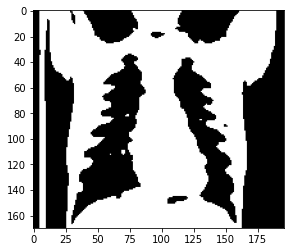

In [ ]:
resultado = pipeline4(img[1])
print(imagens[1])
mostrar_imagemRGB(resultado)

####Paciente não saudável

In [ ]:
resultado = pipeline4(img[0])
print(imagens[0])
mostrar_imagemRGB(resultado)

##Criando base de dados

In [ ]:
def carrega_data(listaimgs, imagens):
  i = 0
  amostras = []
  classe = []
  for img in listaimgs:
    amostras.append(imagens[i])
    clas = img.split('_')
    classe.append(clas[1][0])
    i = i + 1
  return amostras, classe

In [ ]:
amostras, classe = carrega_data(imagens, img)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(amostras, classe, train_size=0.3, random_state=42)

In [ ]:
for i in range(len(X_train)):
  X_train[i] = X_train[i].reshape(1,-1)

for i in range(len(X_test)):
  X_test[i] = X_test[i].reshape(1,-1)

##Extraindo características

In [ ]:
#criar coluna com hist das imagens
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler

def hist(images):
  hists = []
  for arq in images:
    hist = plt.hist(arq.ravel(), bins=256)
    hists.append(hist[0])
  return hists

print(hist(dados['IMAGEM']))

# dados['HIST'] = hist(dados['IMAGEM'])

##Classificação com algoritmos de Machine Learning

###Algoritmo KNN

In [ ]:
parametros = {
    "n_neighbors": [2, 3],
    "metric": ["euclidean", "manhattam"]
}

knn = GridSearchCV(KNeighborsClassifier(), parametros)

knn.fit(X_train, y_train)

In [ ]:
knn.score(X=X_test, y=y_test)

In [ ]:
predicao = knn.predict(X_test)

verdadeiros_positivos, falsos_positivos, falsos_negativos, verdadeiros_negativos = confusion_matrix(y_test, predicao).ravel()

In [ ]:
verdadeiros_positivos, verdadeiros_negativos

In [ ]:
falsos_positivos, falsos_negativos

###Algoritmo MLP

###Algoritmo SVM

##Classificação com algoritmos de Deep Learning

###VGG16

###Inception V3

In [ ]:
data , label = load_data('dataset/geometric',['circle','square','star','triangle'])